<a href="https://colab.research.google.com/github/kapilpandey09/ML_project/blob/main/aiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
#loading the csv file help of pandas  DataFrame
df = pd.read_csv('/content/sample_data/gld_price_data.csv')

In [10]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
# number of rows and columns
df.shape

(2290, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
# checking the number of missing values
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [16]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
# correlation:
# positive correlation
# negative correlation

In [28]:
correlation = df.drop('Date', axis=1).corr()

<Axes: >

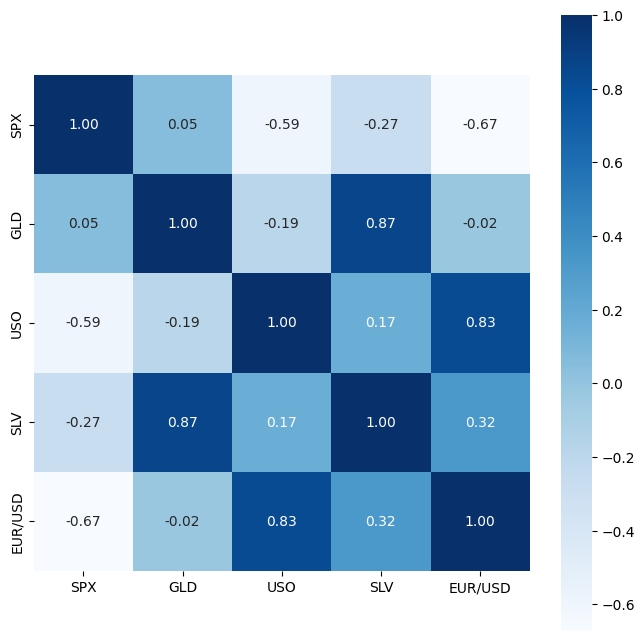

In [34]:
#  constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square =True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [31]:
#correlation values of GLD
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3570782398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

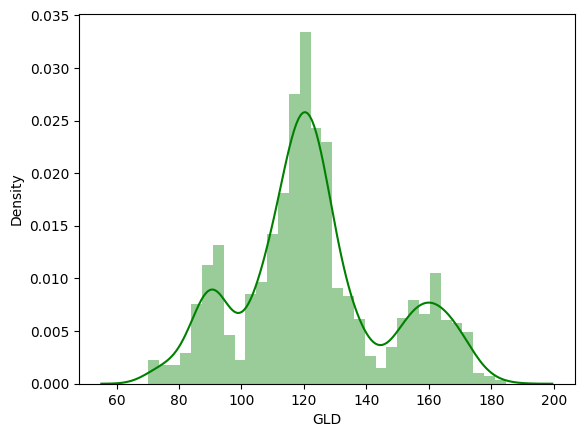

In [35]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'], color='green')

Splitting the features and Target

In [38]:
X = df.drop(['Date', 'GLD'], axis=1)
Y = df['GLD']

In [40]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [41]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [42]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
# Model Training : Random Forest Algorithm
regressor = RandomForestRegressor(n_estimators=100)


In [44]:
# training model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
# Model Evalution
# predication on Data

test_data_prediction = regressor.predict(X_test)

In [46]:
print(test_data_prediction)
#

[168.60859943  81.9607001  115.8938003  127.70290096 120.52100129
 154.7684976  150.25429824 126.22410048 117.52079889 126.01770075
 116.52940074 171.18720094 142.07489886 167.71289881 115.10819986
 117.61450042 136.82200346 170.06580039 159.89460291 158.31719977
 155.10110019 125.4588003  175.47090023 156.95200319 125.25320041
  93.87649945  77.97169997 120.56910033 119.19969963 167.54610038
  88.12750089 125.39090042  91.13610078 117.69200041 121.17449888
 136.44800058 115.33480117 115.05970045 147.21129946 107.28660112
 103.89400217  87.15559771 126.6206002  118.07139979 152.98299929
 119.57129984 108.38519994 108.49799833  93.23720076 127.14229787
  74.79660064 113.601099   121.26860018 111.33799906 118.89439895
 120.49389954 158.86040094 166.87180134 146.97259659  85.68769848
  94.48500023  86.73439917  90.47640056 119.04390062 126.41570067
 127.45530017 167.39490029 122.31759945 117.40079892  98.69210041
 168.64420187 142.80859777 131.83000138 121.17010235 121.04969911
 119.86230

In [47]:
# square values error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [48]:
error_score

0.9892767486547343

In [49]:
# Compare the actual values and predict values in aplot


In [50]:
Y_test = list(Y_test)

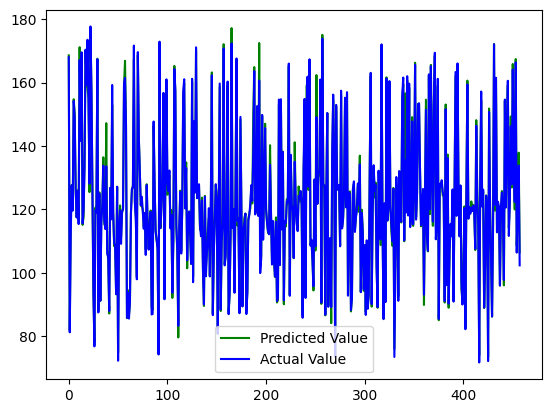

In [57]:
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.legend()
plt.show()